# Insert JPEG images without and with recompression

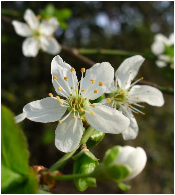

In [1]:
from pyx import *

i = bitmap.jpegimage("jpeg.jpg")
c = canvas.canvas()
c.insert(bitmap.bitmap(0, 0, i, compressmode=None))
c

With the `bitmap.jpegimage` class, PyX allows you to directly insert a
JPEG image into a canvas. It extracts the compressed JPEG data and makes
the data available to a PyX bitmap without recompression (i.e. without loss
of quality). 

<img src="http://pyx.sourceforge.net/bend.png" align="left"> Note that you need to set `compressmode` to `None` when creating the
bitmap instance, since the data provided by the image instance `i` is
already compressed. If you forget to do so, PyX will fail and report about
this mistake. (The original source of the problem is that PyX tries to
compress all images using the gzip method by default and you need to
turn off this feature to prevent the data from being double compressed.)

Since we have some image data in this example, let us also discuss how to use
the [Python Imaging Libary PIL http://www.pythonware.com/products/pil/] to load
the data and write it to the file. The straightforward solution would be to
replace the creation of the `bitmap.jpegimage` instance by:

    import Image
    i = Image.open("jpeg.jpg")

While this works perfectly, it will result in a totally uncompressed
image. The size of the EPS file will for example become almost 1.1MB.

In a next step, you may turn on the default gzip-based compression by
omitting the 'compressmode=None' (or by setting `compressmode="Flate"`
explicitely). This will reduce the file size down to about 727KB (EPS)
which is still much larger than the version in the above example which
used the JPEG compression. Note that this does not mean that the gzip
based compression method is bad in general - it is just bad compared to
the JPEG method for certain kind of image data like photos.

Finally, since the image instance is a PIL instance, we can also use
`compressmode="DCT"`, which turns on the lossy JPEG compression method.
This will restore the file size to similar values as we got previously by using
the `bitmap.jpegimage` instance. The file size and quality of the loosy
compression can be adjusted by the `dctquality`, `dctoptimize`, and
`dctprogression` parameters of the `bitmap` constructor. Nevertheless, it is
important to note that you will always get some additional artifacts due
to the recompression by the lossy JPEG compression method. It is also
important to note that the original version shown in this example (using
`bitmap.jpegimage`) does not use the PIL at all.
